# Анализ числа соседей и транзакций

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [3]:
users_features = pd.read_csv("../dataset/custom/UserData.csv")
users_features.head()

,userId,addr_cnt,outcoming_tx_cnt,incoming_tx_cnt,input_users_cnt,output_users_cnt,class,active_time_steps_cnt,btc_transacted_total,btc_sent_total,...,btc_received_median,interracted_output_address_cnt,interracted_input_address_cnt,overall_activity_coef,user_ts_fees_share_mean,user_ts_fees_share_min,user_ts_fees_share_max,whole_fee_4,whole_fee_5,whole_fee_6
0,1,1,0.0,1.0,1.0,0.0,3,1,0.004675,0.000000,...,0.004675,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2,1,1.0,5.0,5.0,1.0,3,1,0.060000,0.030000,...,0.000800,1.0,5.0,0.000000,0.977704,0.977704,0.977704,1.0,1.0,1.0
2,3,1,0.0,1.0,1.0,0.0,3,1,0.004900,0.000000,...,0.004900,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,4,5656,167.0,4110.0,3546.0,215.0,1,26,23970.064106,12838.606215,...,0.015823,328.0,11097.0,0.084105,9.835605,3.099915,19.605217,0.0,0.0,0.0
4,5,1,0.0,1.0,1.0,0.0,3,1,0.007039,0.000000,...,0.007039,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


Text(0.5, 1.0, 'Output users cnt distribution')

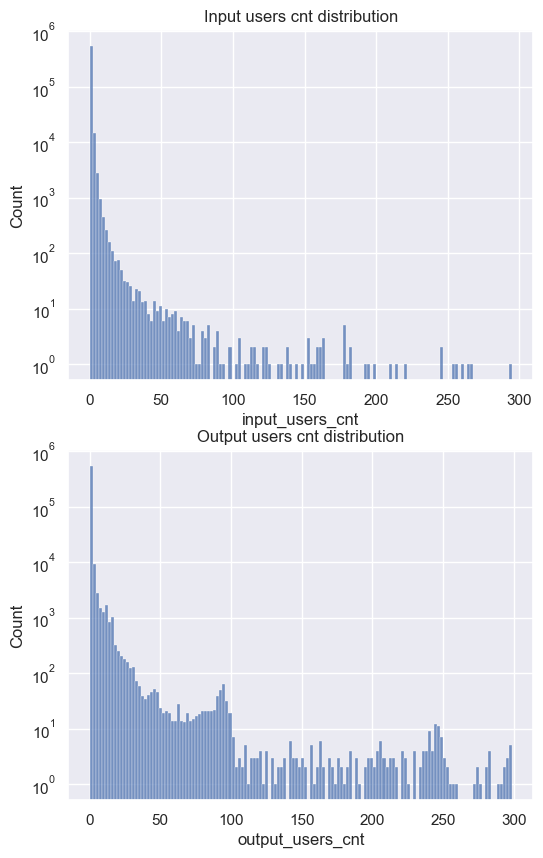

In [16]:
fig, ax = plt.subplots(2,1, figsize=(6,10))

sns.histplot(users_features[users_features["input_users_cnt"] < 300]["input_users_cnt"], ax=ax[0], bins=140)
ax[0].set_yscale("log")
ax[0].set_title("Input users cnt distribution")

sns.histplot(users_features[users_features["output_users_cnt"] < 300]["output_users_cnt"], ax=ax[1], bins=140)
ax[1].set_yscale("log")
ax[1].set_title("Output users cnt distribution")


Text(0.5, 1.0, 'Incoming and outcoming neighbors - Illicit')

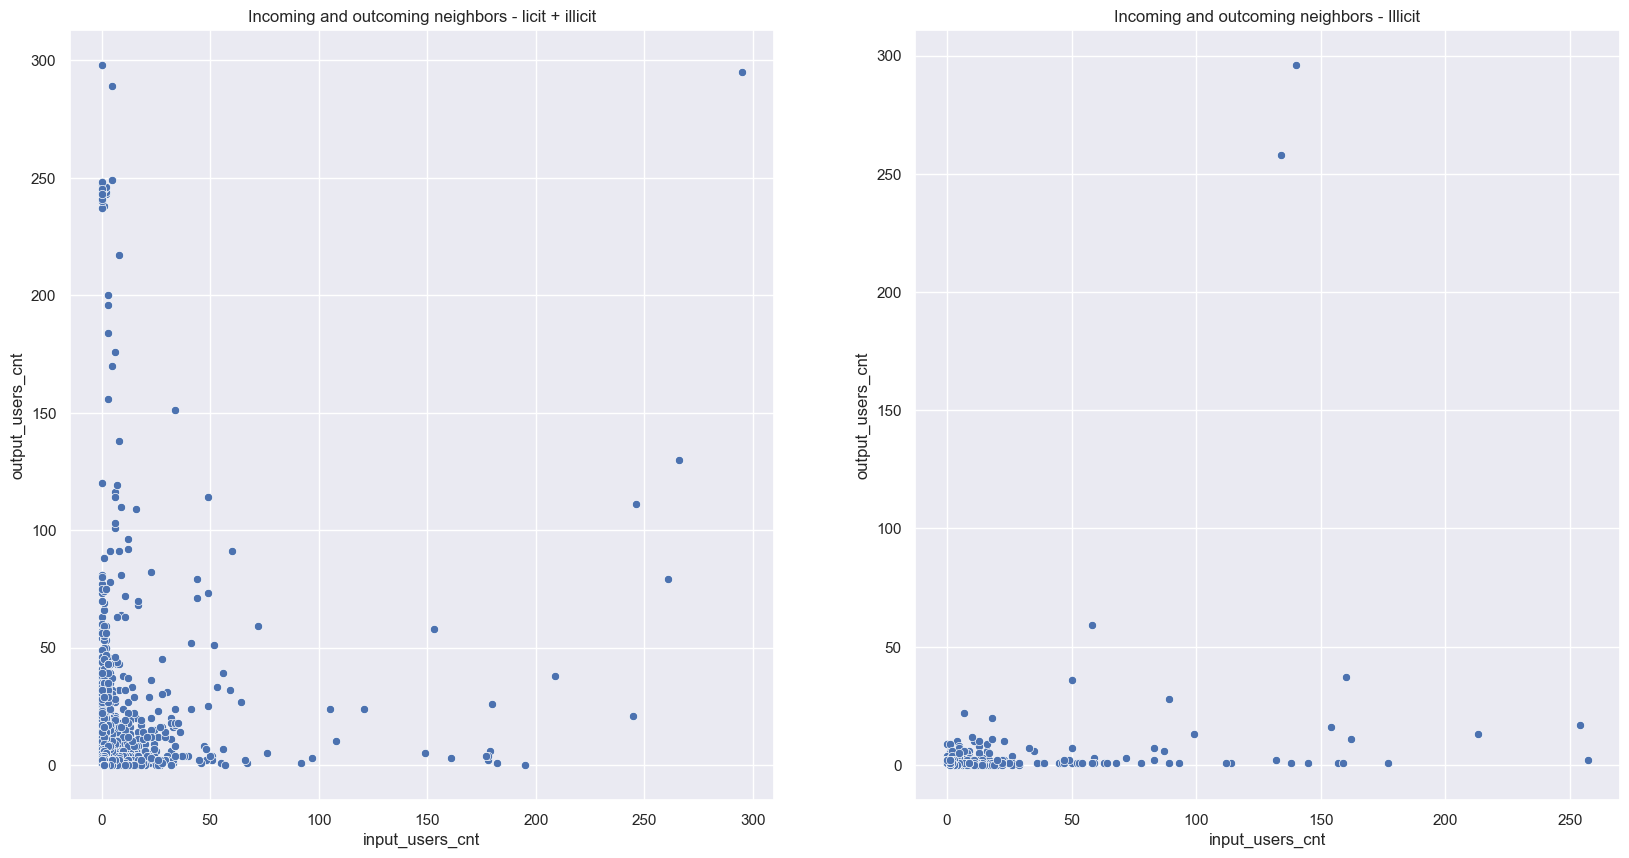

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

clip = 300
sns.scatterplot(
    data=users_features[(users_features["class"] == 2) & (users_features["input_users_cnt"] < clip) & (users_features["output_users_cnt"] < clip)],
    x="input_users_cnt",
    y="output_users_cnt",
    # hue="class",
    ax=ax[0]
)
ax[0].set_title("Incoming and outcoming neighbors - licit + illicit")

sns.scatterplot(
    data=users_features[(users_features["class"] == 1) & (users_features["input_users_cnt"] < clip) & (users_features["output_users_cnt"] < clip)],
    x="input_users_cnt",
    y="output_users_cnt",
    # hue="class",
    ax=ax[1]
)
ax[1].set_title("Incoming and outcoming neighbors - Illicit")


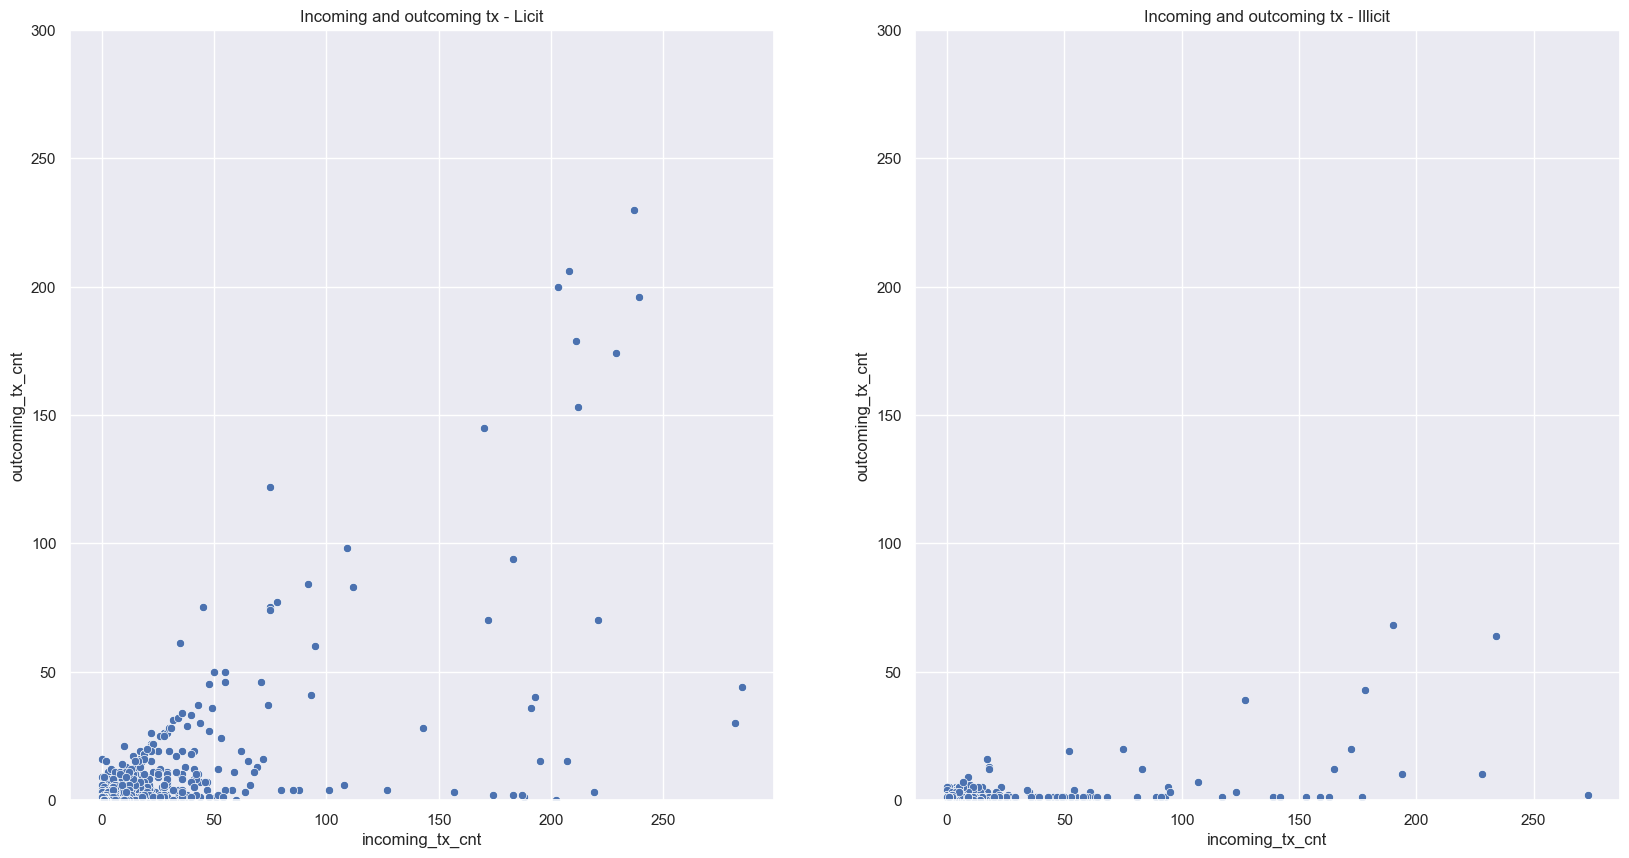

In [48]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

clip = 300
sns.scatterplot(
    data=users_features[(users_features["class"] == 2) & (users_features["incoming_tx_cnt"] < clip) & (users_features["outcoming_tx_cnt"] < clip)],
    x="incoming_tx_cnt",
    y="outcoming_tx_cnt",
    # hue="class",
    ax=ax[0]
)
ax[0].set_title("Incoming and outcoming tx - Licit")
ax[0].set_ybound((0, 300))

sns.scatterplot(
    data=users_features[(users_features["class"] == 1) & (users_features["incoming_tx_cnt"] < clip) & (users_features["outcoming_tx_cnt"] < clip)],
    x="incoming_tx_cnt",
    y="outcoming_tx_cnt",
    # hue="class",
    ax=ax[1]
)
ax[1].set_title("Incoming and outcoming tx - Illicit")
ax[1].set_ybound((0, 300))



# Анализ числа time steps действийЪ

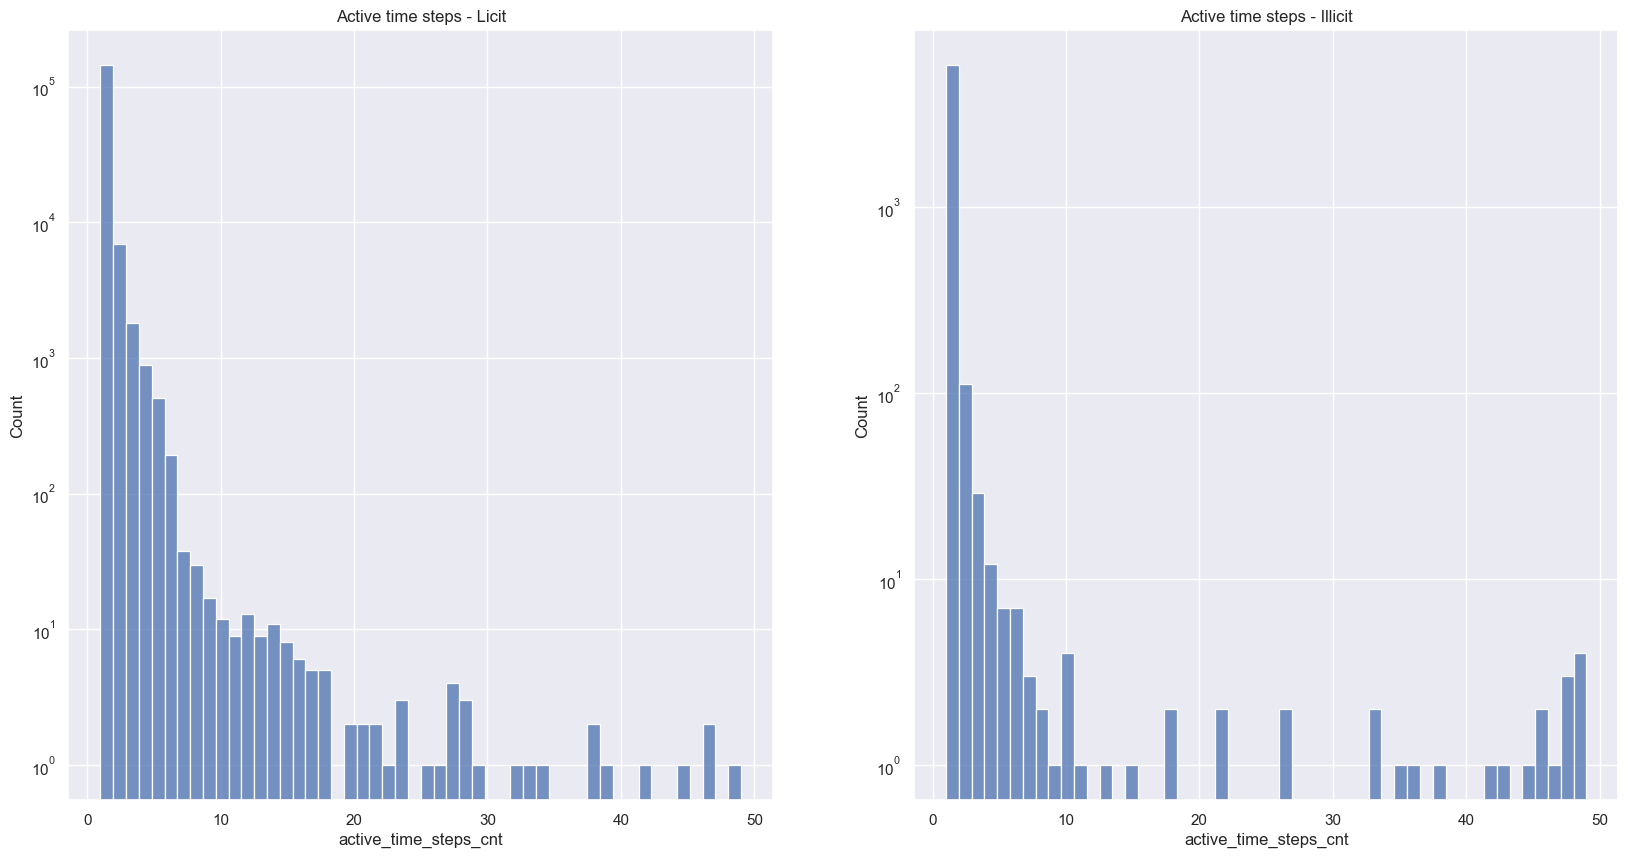

In [55]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.histplot(
    users_features[users_features["class"] == 2]["active_time_steps_cnt"],
    ax=ax[0],
    bins=50,
)
ax[0].set_title("Active time steps - Licit")
ax[0].set_yscale("log")

sns.histplot(
    users_features[users_features["class"] == 1]["active_time_steps_cnt"],
    ax=ax[1],
    bins=50,
)
ax[1].set_title("Active time steps - Illicit")
ax[1].set_yscale("log")


**TODO**: придумать метрику для определения, как активен был пользователь на всем временном отрезке

# Анализ числа кошельков

In [4]:
users_features.head()

,userId,addr_cnt,outcoming_tx_cnt,incoming_tx_cnt,input_users_cnt,output_users_cnt,class,active_time_steps_cnt,btc_transacted_total,btc_sent_total,...,btc_received_median,interracted_output_address_cnt,interracted_input_address_cnt,overall_activity_coef,user_ts_fees_share_mean,user_ts_fees_share_min,user_ts_fees_share_max,whole_fee_4,whole_fee_5,whole_fee_6
0,1,1,0.0,1.0,1.0,0.0,3,1,0.004675,0.000000,...,0.004675,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2,1,1.0,5.0,5.0,1.0,3,1,0.060000,0.030000,...,0.000800,1.0,5.0,0.000000,0.977704,0.977704,0.977704,1.0,1.0,1.0
2,3,1,0.0,1.0,1.0,0.0,3,1,0.004900,0.000000,...,0.004900,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,4,5656,167.0,4110.0,3546.0,215.0,1,26,23970.064106,12838.606215,...,0.015823,328.0,11097.0,0.084105,9.835605,3.099915,19.605217,0.0,0.0,0.0
4,5,1,0.0,1.0,1.0,0.0,3,1,0.007039,0.000000,...,0.007039,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
users_features["addr_cnt"].value_counts()

addr_cnt
1      538233
2       16982
3        5407
4        2831
5        1578
        ...  
466         1
199         1
208         1
236         1
94          1
Name: count, Length: 264, dtype: int64

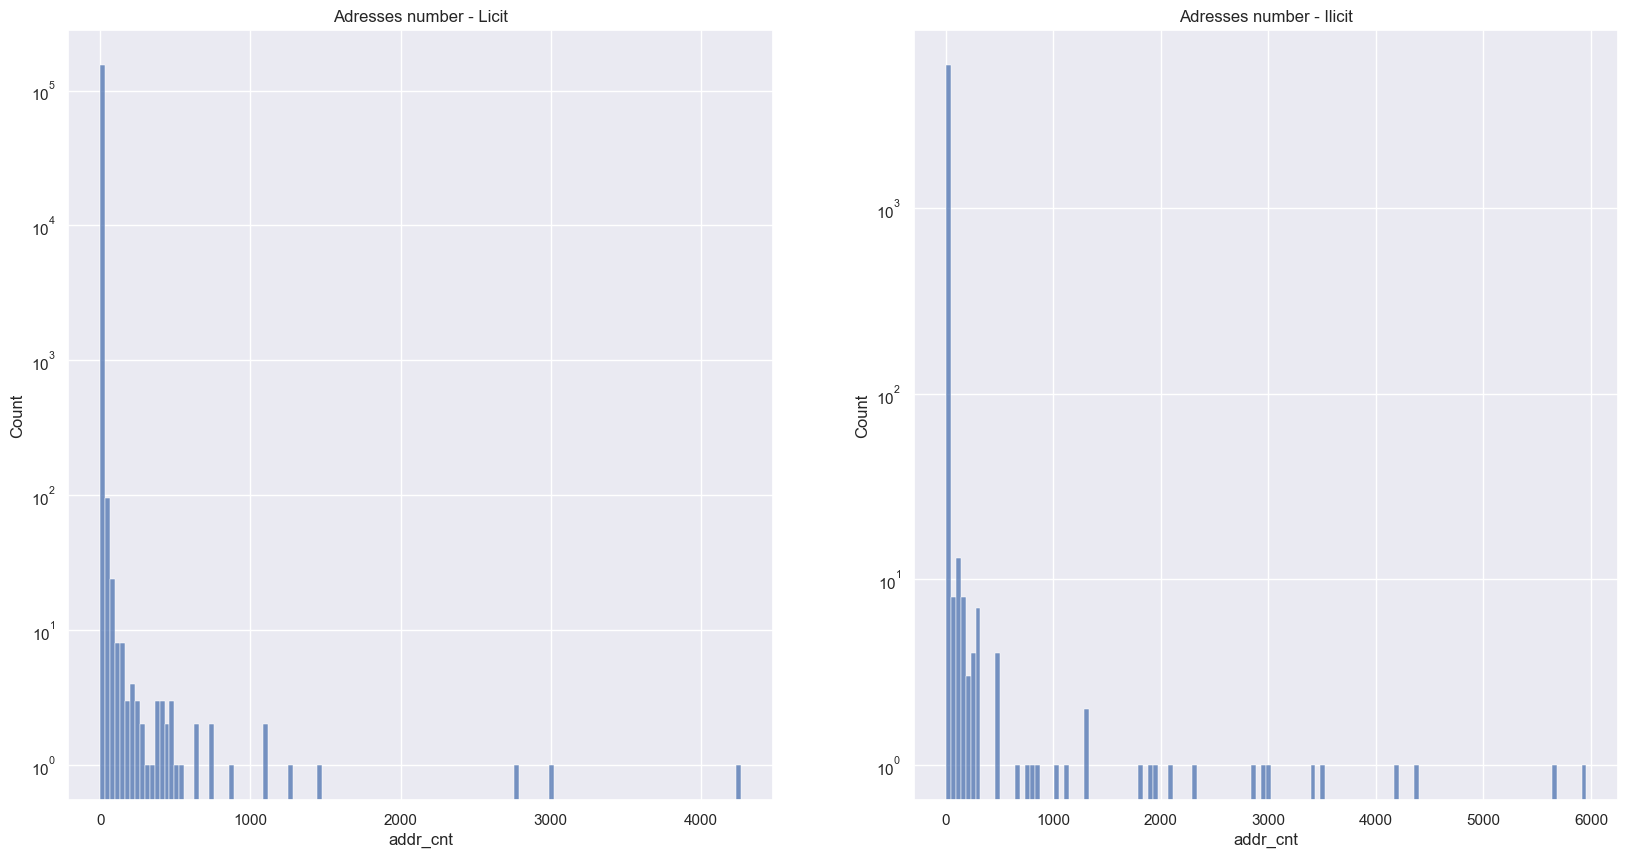

In [67]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.histplot(
    users_features[(users_features["class"] == 2) & (users_features["addr_cnt"] < 10000)]["addr_cnt"],
    ax=ax[0],
    bins=130,
)
ax[0].set_title("Adresses number - Licit")
ax[0].set_yscale("log")
# ax[0].set_xbound((0,100))

sns.histplot(
    users_features[(users_features["class"] == 1) & (users_features["addr_cnt"] < 10000)]["addr_cnt"],
    ax=ax[1],
    bins=130,
)
ax[1].set_title("Adresses number - Ilicit")
ax[1].set_yscale("log")


<Axes: title={'center': 'Adresses number - Licit + illicit'}, xlabel='addr_cnt', ylabel='Count'>

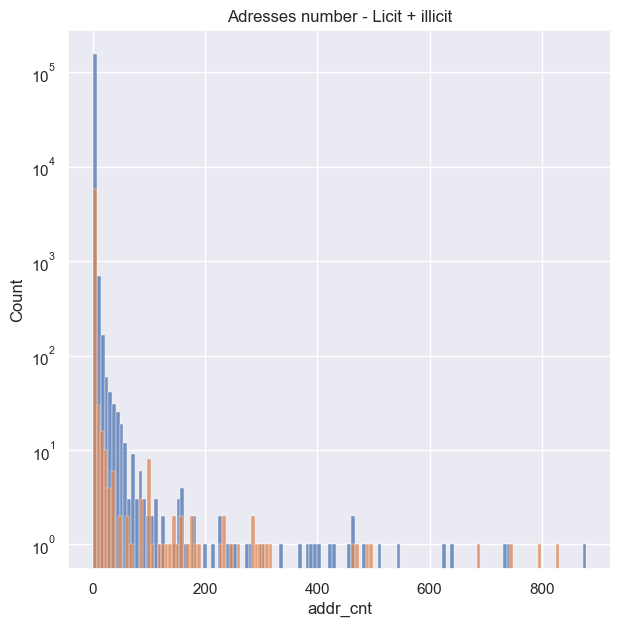

In [71]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

sns.histplot(
    users_features[(users_features["class"] == 2) & (users_features["addr_cnt"] < 1000)]["addr_cnt"],
    ax=ax,
    bins=130,
)
ax.set_title("Adresses number - Licit + illicit")
ax.set_yscale("log")
# ax[0].set_xbound((0,100))

sns.histplot(
    users_features[(users_features["class"] == 1) & (users_features["addr_cnt"] < 1000)]["addr_cnt"],
    ax=ax,
    bins=130,
)


/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/4017597474.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/4017597474.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='addr_cnt', ylabel='Density'>

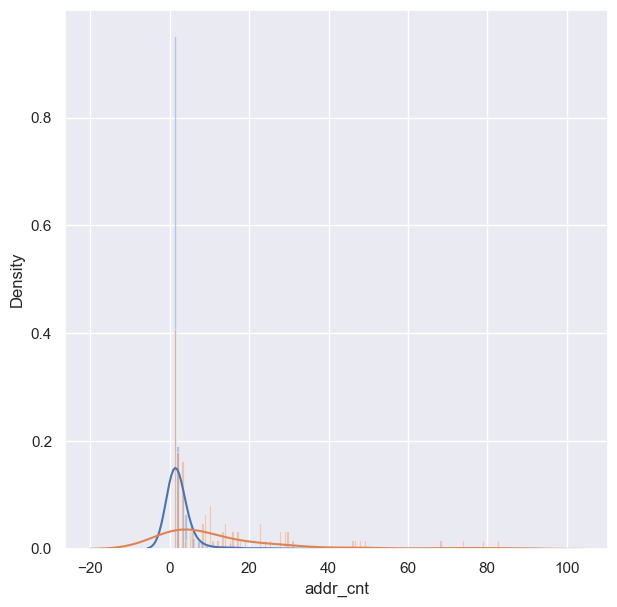

In [89]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

users_features_addr_cnt = users_features[users_features["addr_cnt"] < 1000][["class", "addr_cnt"]].copy()
users_features_addr_cnt["addr_cnt"] = np.floor(users_features_addr_cnt["addr_cnt"] / 10)
users_features_addr_cnt["addr_cnt"]
sns.distplot(
    users_features_addr_cnt[(users_features_addr_cnt["class"] == 2) & (users_features_addr_cnt["addr_cnt"] > 0)]["addr_cnt"],
    ax=ax,
    bins=130,
)
sns.distplot(
    users_features_addr_cnt[(users_features_addr_cnt["class"] == 1) & (users_features_addr_cnt["addr_cnt"] > 0)]["addr_cnt"],
    ax=ax,
    bins=130,
)


In [82]:
users_features_addr_cnt[(users_features_addr_cnt["class"] == 1) & (users_features_addr_cnt["addr_cnt"] > 0)]["addr_cnt"].value_counts()

addr_cnt
1.0     25
2.0     11
3.0     10
10.0     5
9.0      4
14.0     3
23.0     3
8.0      3
30.0     2
6.0      2
29.0     2
5.0      2
16.0     2
17.0     2
13.0     2
28.0     2
4.0      1
11.0     1
74.0     1
18.0     1
48.0     1
83.0     1
47.0     1
46.0     1
24.0     1
19.0     1
49.0     1
68.0     1
25.0     1
79.0     1
15.0     1
31.0     1
12.0     1
Name: count, dtype: int64

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/3505630740.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/3505630740.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='addr_cnt', ylabel='Density'>

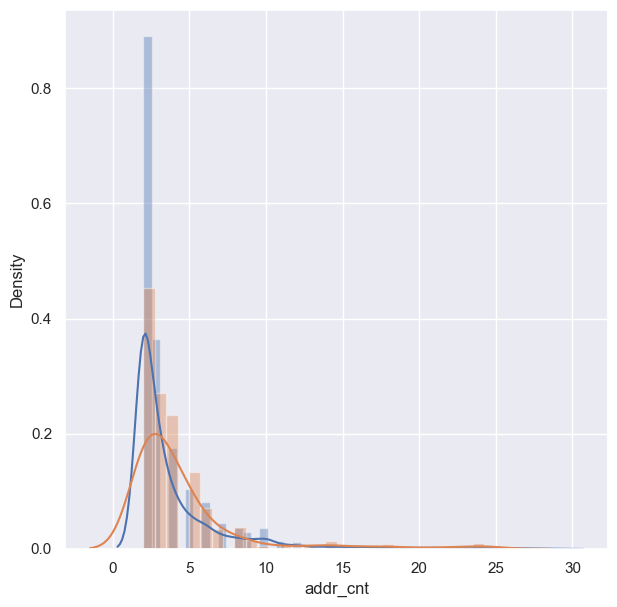

In [88]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

users_features_addr_cnt = users_features[users_features["addr_cnt"] < 30][["class", "addr_cnt"]].copy()
users_features_addr_cnt["addr_cnt"] = np.floor(users_features_addr_cnt["addr_cnt"] / 1)
users_features_addr_cnt["addr_cnt"]
sns.distplot(
    users_features_addr_cnt[(users_features_addr_cnt["class"] == 2) & (users_features_addr_cnt["addr_cnt"] > 1)]["addr_cnt"],
    ax=ax,
)
sns.distplot(
    users_features_addr_cnt[(users_features_addr_cnt["class"] == 1) & (users_features_addr_cnt["addr_cnt"] > 1)]["addr_cnt"],
    ax=ax,
)


**Видно, что у фродеров число кошельков распределено иначе - с бОльшей вороятностью имеют большее число кошельков**

# Анализ адресов, с которыми было взаимодействие

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/1348947345.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_31467/1348947345.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='interracted_input_address_cnt', ylabel='Density'>

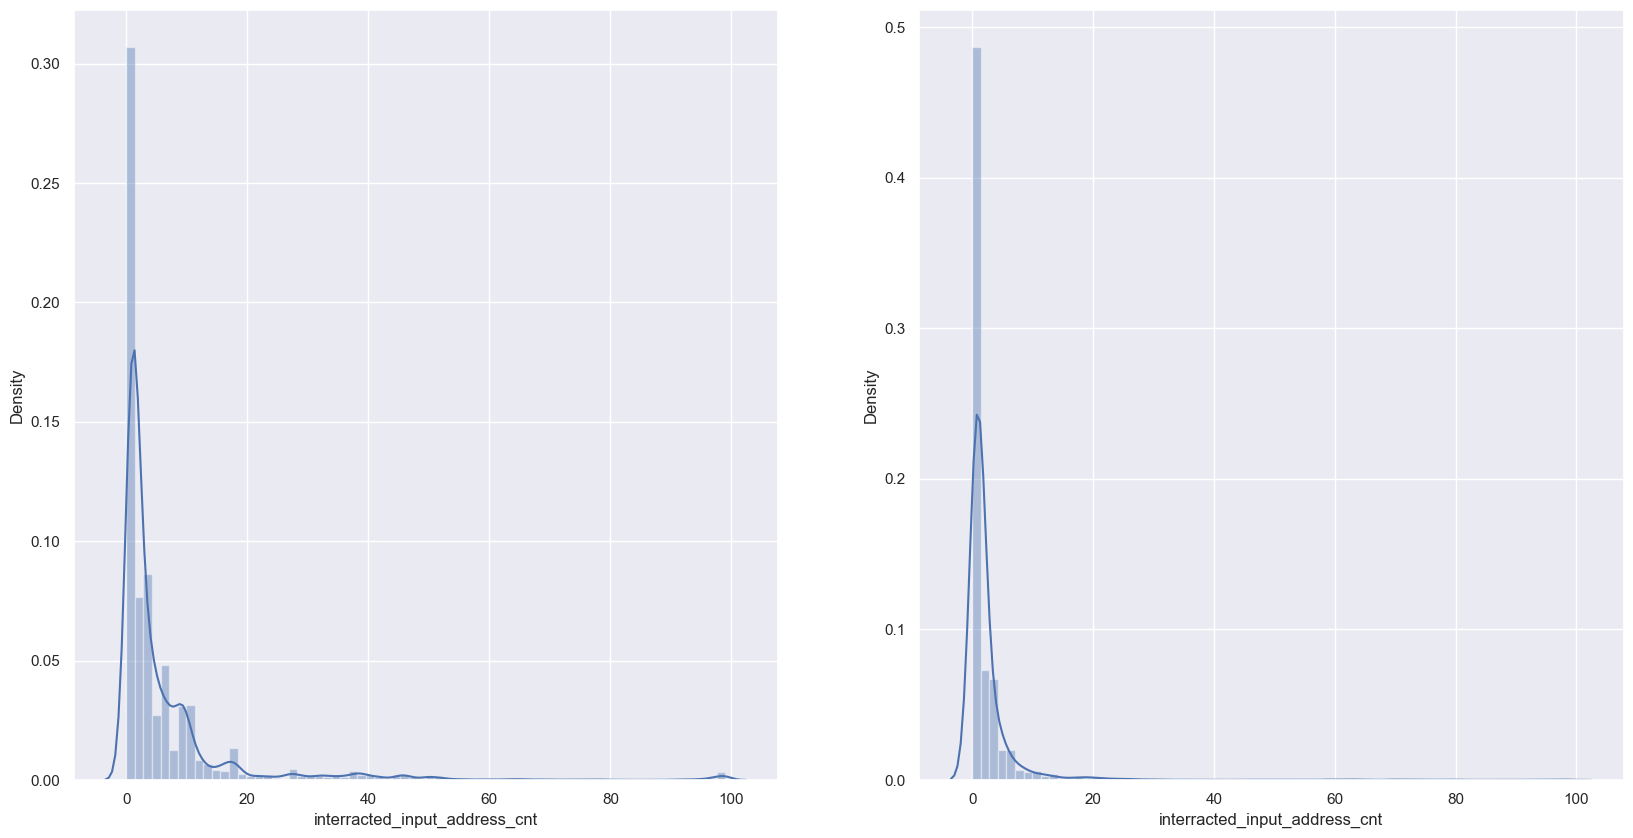

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

clip = users_features[users_features["class"] != 3]["interracted_input_address_cnt"].quantile(0.99)

sns.histplot(
    users_features[(users_features["class"] == 2) & (users_features["interracted_input_address_cnt"] < clip)]["interracted_input_address_cnt"],
    ax=ax[0],
    bins=70
)
ax[0].set_title("")
# ax[0].set_yscale("log")
sns.histplot(
    users_features[(users_features["class"] == 1) & (users_features["interracted_input_address_cnt"] < clip)]["interracted_input_address_cnt"],
    ax=ax[1],
    bins=70
)
# ax[1].set_yscale("log")


Text(0.5, 1.0, 'Illicit and Licit - input interracted addresses')

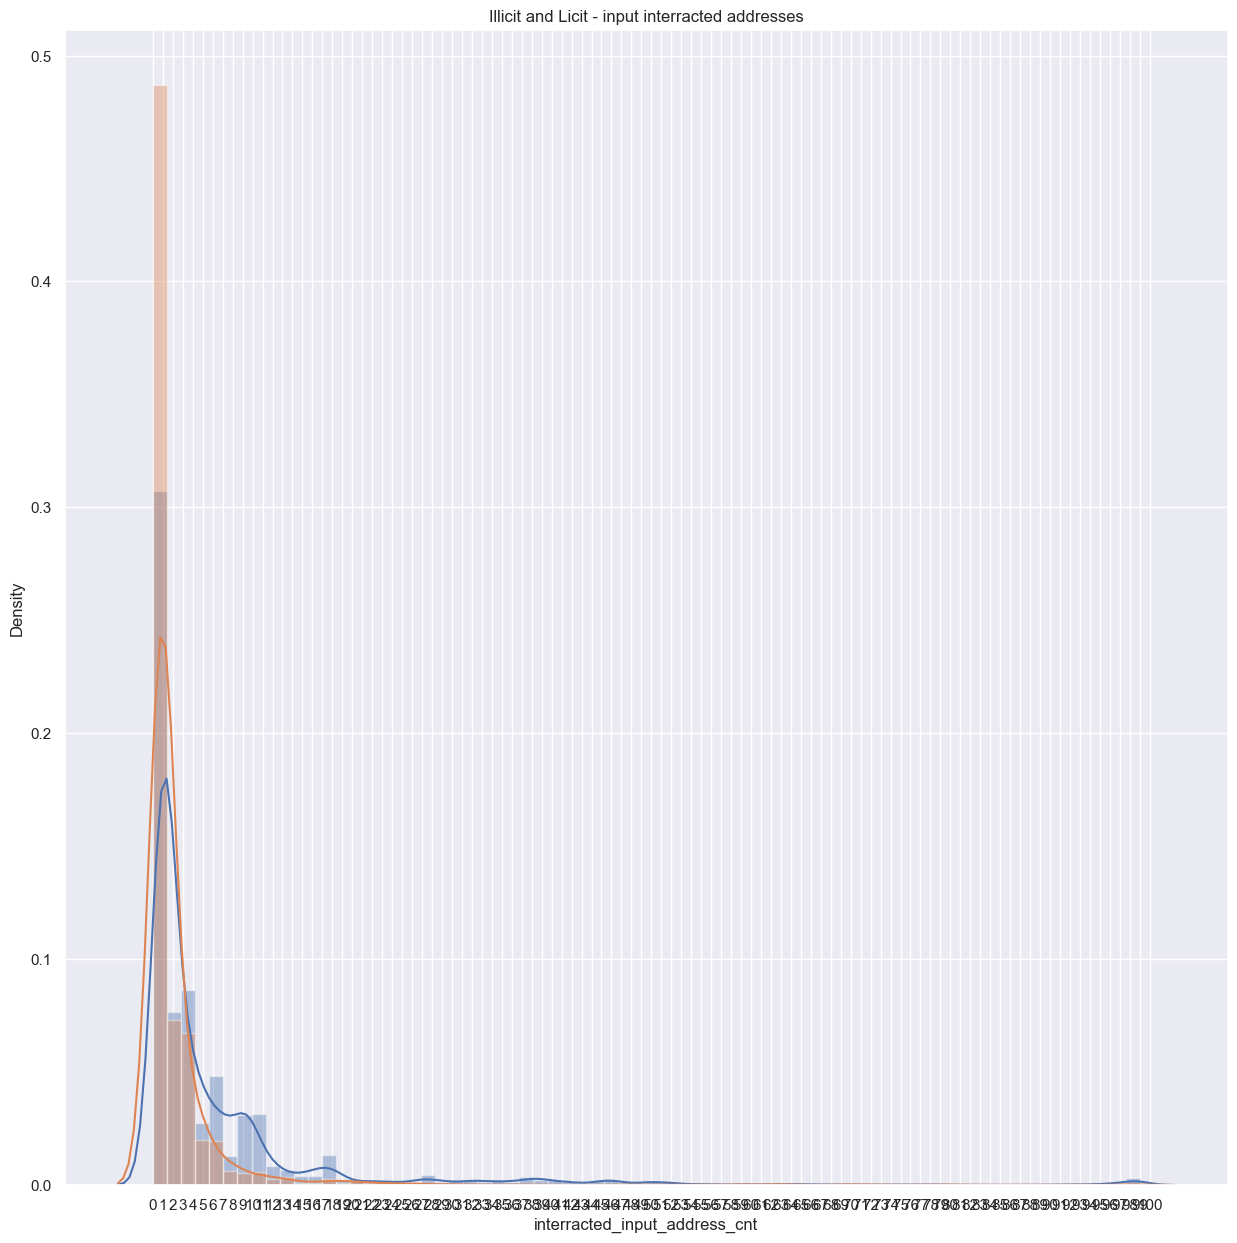

In [11]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

clip = users_features[users_features["class"] != 3]["interracted_input_address_cnt"].quantile(0.99)

sns.distplot(
    users_features[(users_features["class"] == 2) & (users_features["interracted_input_address_cnt"] < clip)]["interracted_input_address_cnt"],
    bins=70
)

sns.distplot(
    users_features[(users_features["class"] == 1) & (users_features["interracted_input_address_cnt"] < clip)]["interracted_input_address_cnt"],
    bins=70
)
ax.set_xticks(range(int(np.floor(clip)) + 1))
ax.set_title("Illicit and Licit - input interracted addresses")


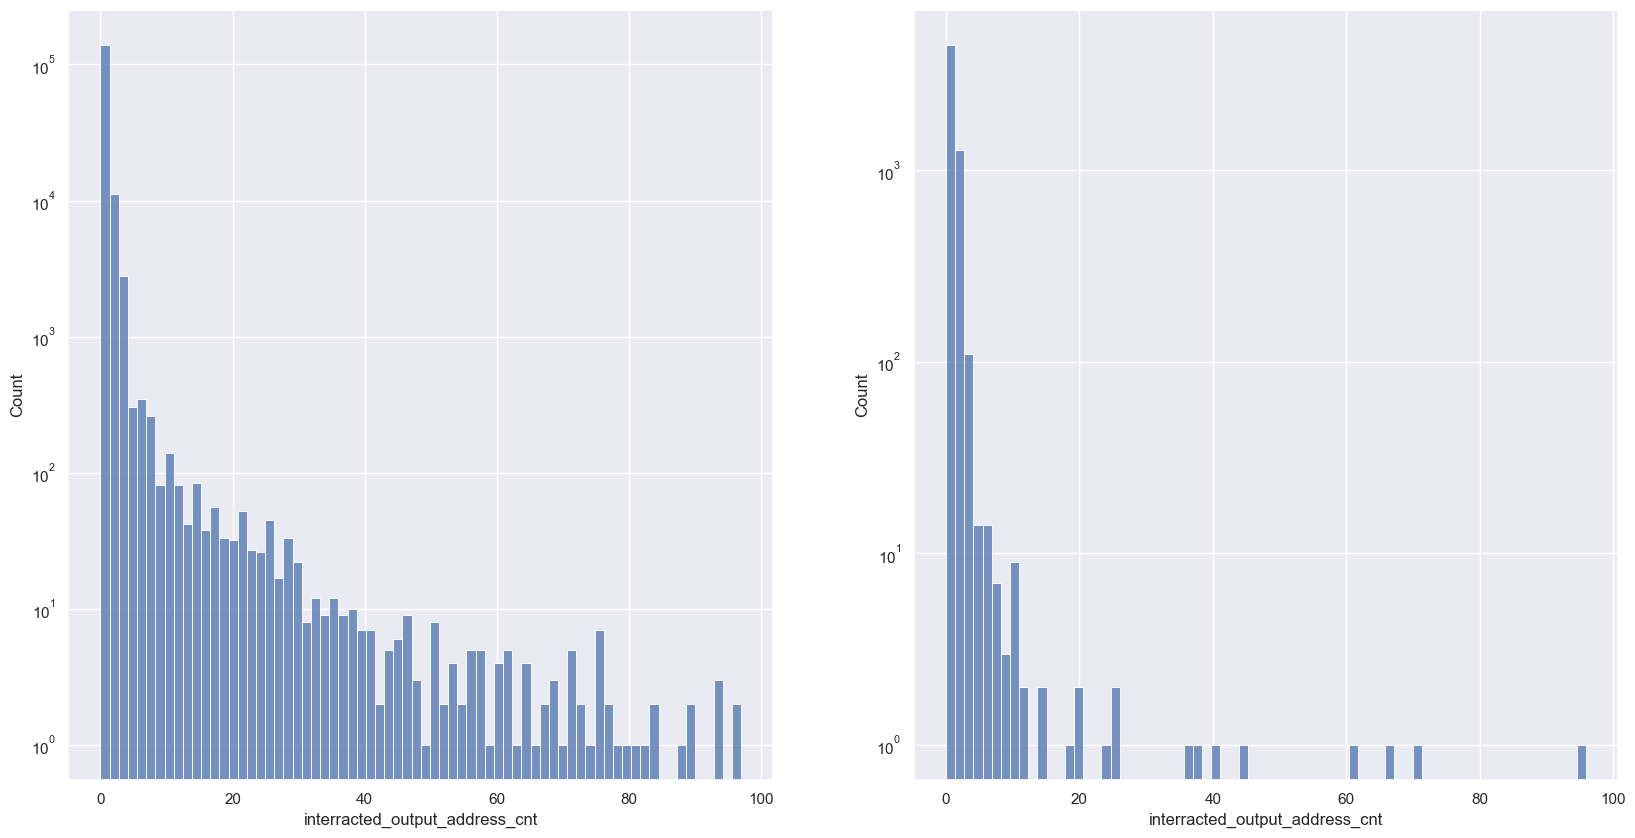

In [117]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

clip = users_features[users_features["class"] != 3]["interracted_input_address_cnt"].quantile(0.99)

sns.histplot(
    users_features[(users_features["class"] == 2) & (users_features["interracted_output_address_cnt"] < clip)]["interracted_output_address_cnt"],
    ax=ax[0],
    bins=70
)
ax[0].set_yscale("log")
sns.histplot(
    users_features[(users_features["class"] == 1) & (users_features["interracted_output_address_cnt"] < clip)]["interracted_output_address_cnt"],
    ax=ax[1],
    bins=70
)
ax[1].set_yscale("log")


Text(0.5, 1.0, 'Illicit and Licit - output interracted addresses')

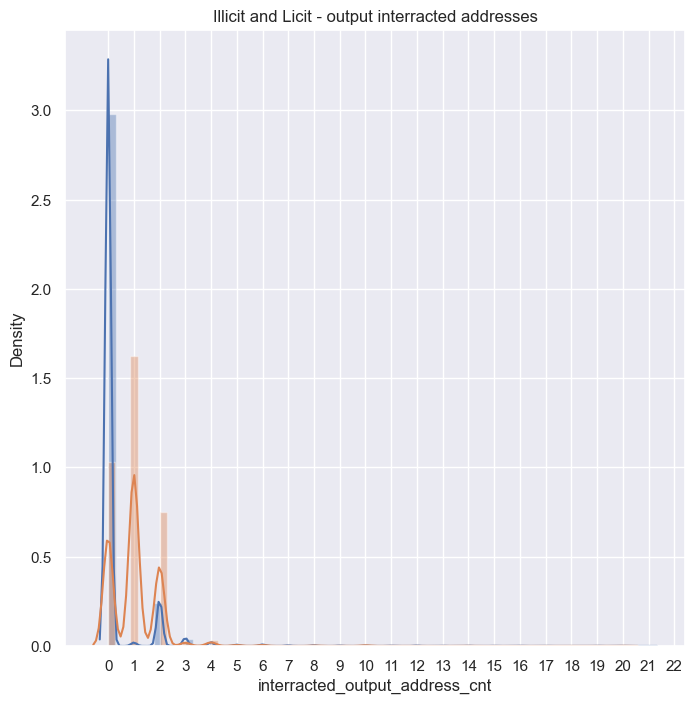

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

clip = users_features[users_features["class"] != 3]["interracted_output_address_cnt"].quantile(0.997)
clip 
sns.distplot(
    users_features[(users_features["class"] == 2) & (users_features["interracted_output_address_cnt"] < clip)]["interracted_output_address_cnt"],
    bins=70
)

sns.distplot(
    users_features[(users_features["class"] == 1) & (users_features["interracted_output_address_cnt"] < clip)]["interracted_output_address_cnt"],
    bins=70
)
ax.set_xticks(range(int(np.floor(clip)) + 1))
ax.set_title("Illicit and Licit - output interracted addresses")


Text(0.5, 1.0, 'Illicit and Licit - total interracted addresses')

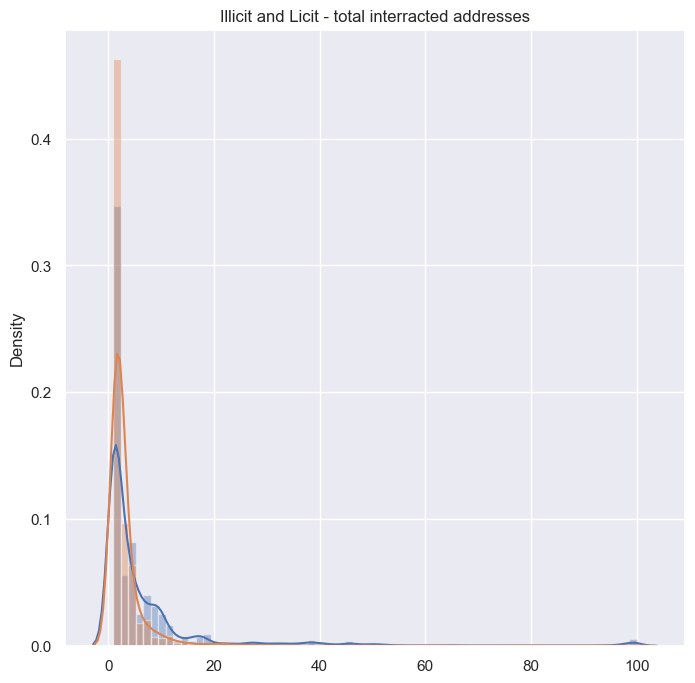

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
users_features[users_features["class"] != 3]
clip = (users_features[users_features["class"] != 3]["interracted_output_address_cnt"] + users_features[users_features["class"] != 3]["interracted_input_address_cnt"]).quantile(0.995)
clip 
licit_prep = users_features[(users_features["class"] == 2) & (users_features["interracted_output_address_cnt"] + users_features["interracted_input_address_cnt"] < clip)]
illicit_prep = users_features[(users_features["class"] == 1) & (users_features["interracted_output_address_cnt"] + users_features["interracted_input_address_cnt"] < clip)]

sns.distplot(
    licit_prep["interracted_output_address_cnt"] + licit_prep["interracted_input_address_cnt"],
    bins=70
)

sns.distplot(
    illicit_prep["interracted_output_address_cnt"] + illicit_prep["interracted_input_address_cnt"],
    bins=70
)
ax.set_title("Illicit and Licit - total interracted addresses")
# ax.set_xticks(range(int(np.floor(clip)) + 1))

# Анализ fees

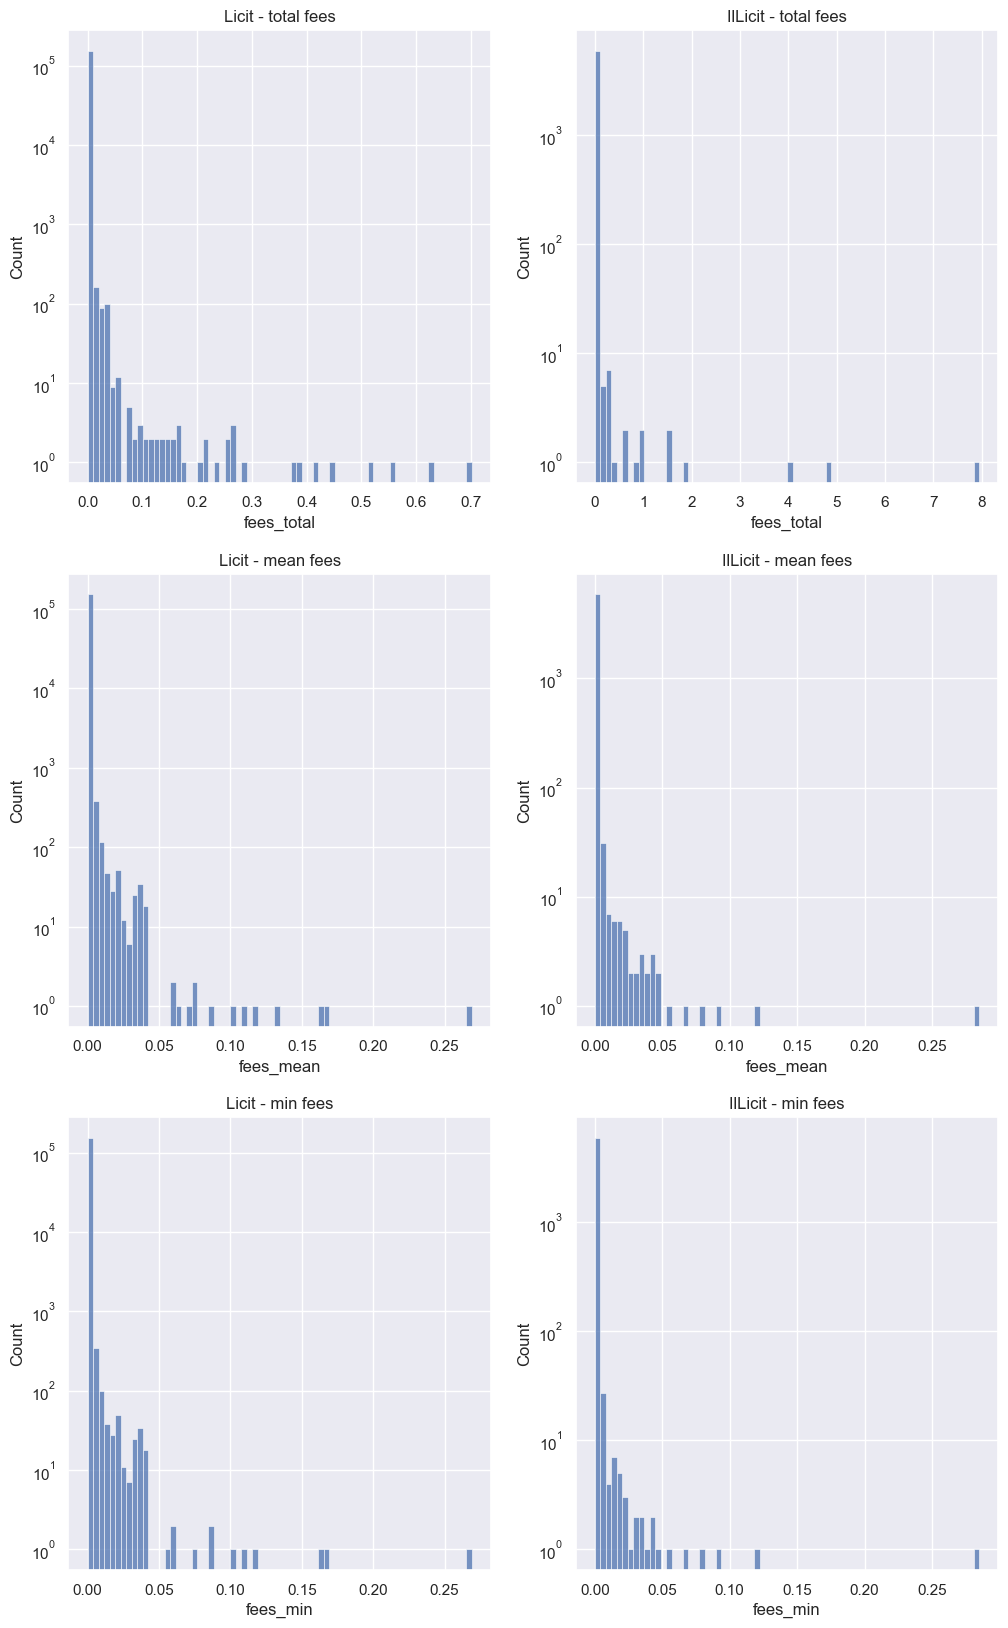

In [26]:
fig, ax = plt.subplots(3,2, figsize=(12,20))

sns.histplot(
    users_features[users_features["class"] == 2],
    x="fees_total",
    bins=70,
    ax=ax[0][0]
)
ax[0][0].set_title("Licit - total fees")
ax[0][0].set_yscale("log")

sns.histplot(
    users_features[users_features["class"] == 1],
    x="fees_total",
    bins=70,
    ax=ax[0][1]
)
ax[0][1].set_title("IlLicit - total fees")
ax[0][1].set_yscale("log")

# -=-=-=-==

sns.histplot(
    users_features[users_features["class"] == 2],
    x="fees_mean",
    bins=70,
    ax=ax[1][0]
)
ax[1][0].set_title("Licit - mean fees")
ax[1][0].set_yscale("log")

sns.histplot(
    users_features[users_features["class"] == 1],
    x="fees_mean",
    bins=70,
    ax=ax[1][1]
)
ax[1][1].set_title("IlLicit - mean fees")
ax[1][1].set_yscale("log")

# -=-=-=-==

sns.histplot(
    users_features[users_features["class"] == 2],
    x="fees_min",
    bins=70,
    ax=ax[2][0]
)
ax[2][0].set_title("Licit - min fees")
ax[2][0].set_yscale("log")

sns.histplot(
    users_features[users_features["class"] == 1],
    x="fees_min",
    bins=70,
    ax=ax[2][1]
)
ax[2][1].set_title("IlLicit - min fees")
ax[2][1].set_yscale("log")


<Axes: xlabel='fees_total', ylabel='Density'>

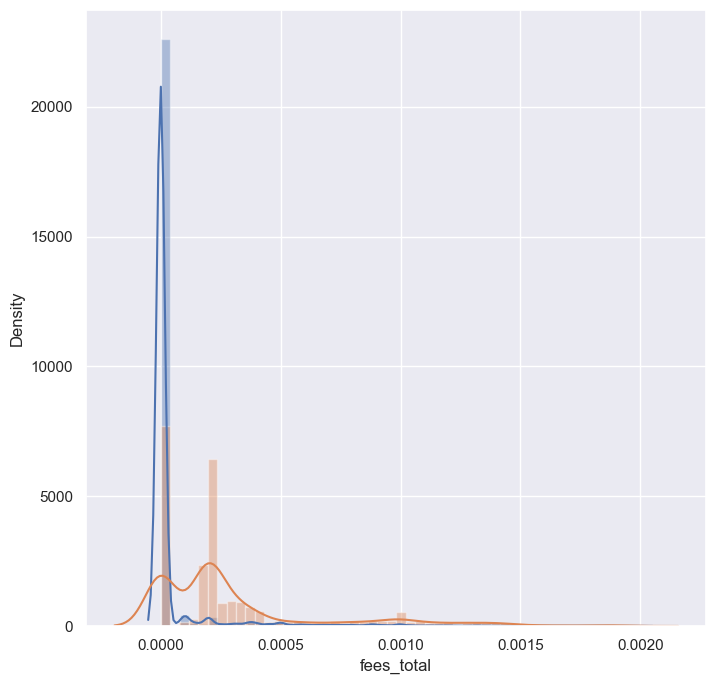

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.distplot(
    users_features[(users_features["class"] == 2) & (users_features["fees_total"] < 0.002)]["fees_total"],
    # x="fees_total",
    # bins=70,
)
sns.distplot(
    users_features[(users_features["class"] == 1) & (users_features["fees_total"] < 0.002)]["fees_total"],
    # x="fees_total",
    # bins=70,
)
# ax.set_xscale("log")


<Axes: xlabel='fees_mean', ylabel='Density'>

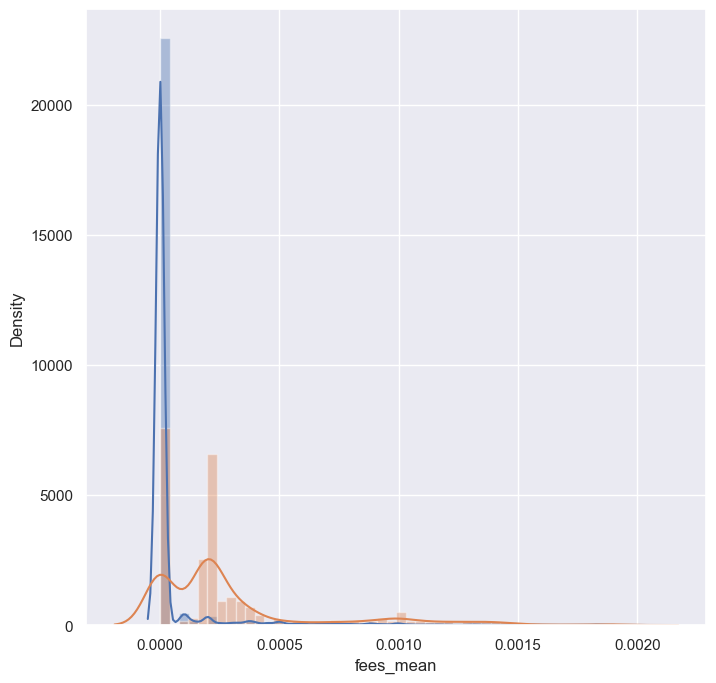

In [39]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.distplot(
    users_features[(users_features["class"] == 2) & (users_features["fees_mean"] < 0.002)]["fees_mean"],
    # x="fees_total",
    # bins=70,
)
sns.distplot(
    users_features[(users_features["class"] == 1) & (users_features["fees_mean"] < 0.002)]["fees_mean"],
    # x="fees_total",
    # bins=70,
)
# ax.set_xscale("log")


<Axes: xlabel='fees_min', ylabel='Density'>

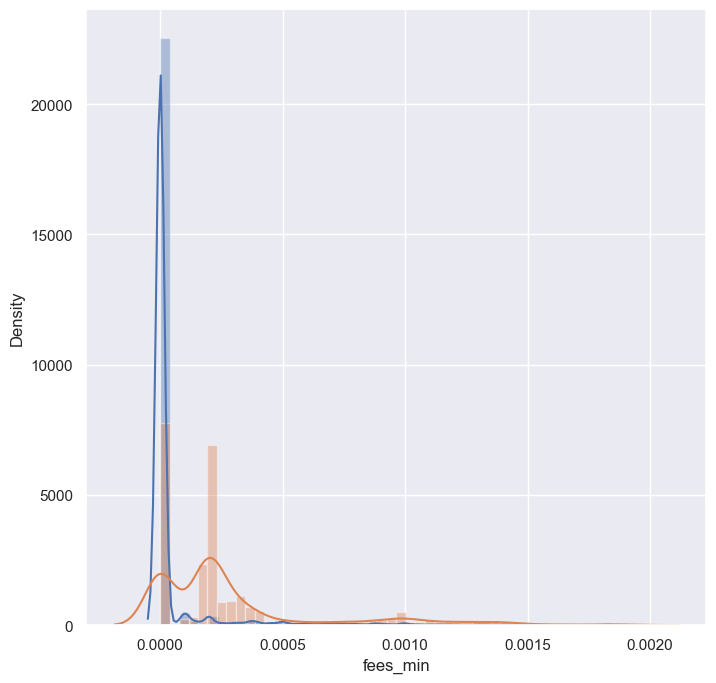

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

sns.distplot(
    users_features[(users_features["class"] == 2) & (users_features["fees_min"] < 0.002)]["fees_min"],
    # x="fees_total",
    # bins=70,
)
sns.distplot(
    users_features[(users_features["class"] == 1) & (users_features["fees_min"] < 0.002)]["fees_min"],
    # x="fees_total",
    # bins=70,
)
# ax.set_xscale("log")


In [31]:
users_features[users_features["class"] == 1]["fees_total"].describe()

count    5995.000000
mean        0.005503
std         0.138341
min         0.000000
25%         0.000000
50%         0.000200
75%         0.000356
max         7.950112
Name: fees_total, dtype: float64

# Анализ Fees относительно средних в ts

In [5]:
users_features.head()

,userId,addr_cnt,outcoming_tx_cnt,incoming_tx_cnt,input_users_cnt,output_users_cnt,class,active_time_steps_cnt,btc_transacted_total,btc_sent_total,...,btc_received_median,interracted_output_address_cnt,interracted_input_address_cnt,overall_activity_coef,user_ts_fees_share_mean,user_ts_fees_share_min,user_ts_fees_share_max,whole_fee_4,whole_fee_5,whole_fee_6
0,1,1,0.0,1.0,1.0,0.0,3,1,0.004675,0.000000,...,0.004675,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,2,1,1.0,5.0,5.0,1.0,3,1,0.060000,0.030000,...,0.000800,1.0,5.0,0.000000,0.977704,0.977704,0.977704,1.0,1.0,1.0
2,3,1,0.0,1.0,1.0,0.0,3,1,0.004900,0.000000,...,0.004900,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,4,5656,167.0,4110.0,3546.0,215.0,1,26,23970.064106,12838.606215,...,0.015823,328.0,11097.0,0.084105,9.835605,3.099915,19.605217,0.0,0.0,0.0
4,5,1,0.0,1.0,1.0,0.0,3,1,0.007039,0.000000,...,0.007039,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


Text(0.5, 1.0, 'user_ts_fees_share_min - illicit and licit')

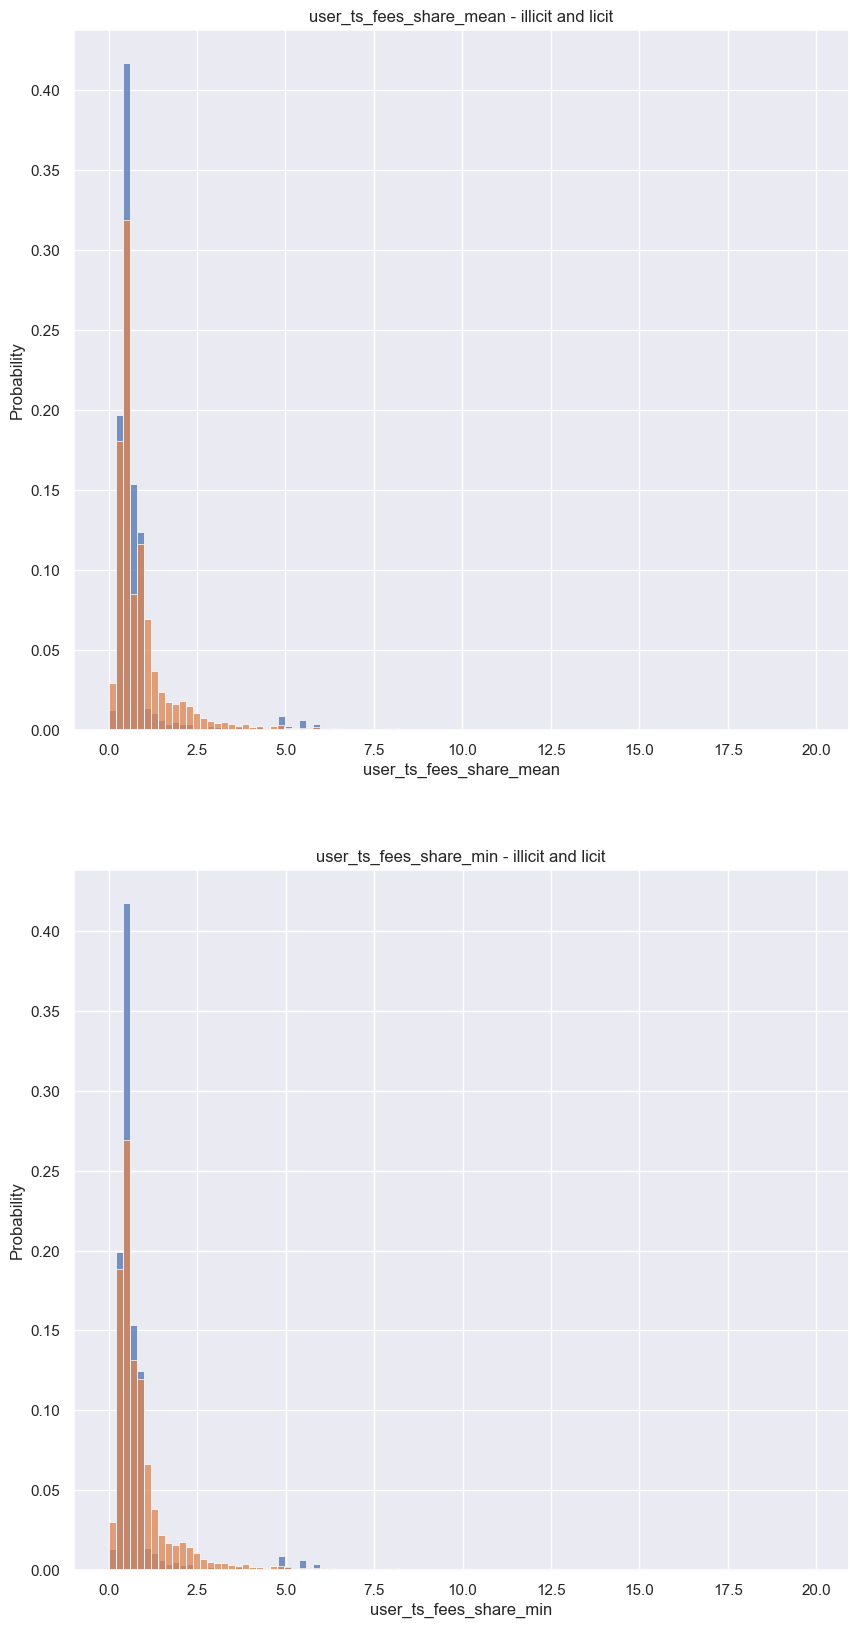

In [19]:
fig, ax = plt.subplots(2,1, figsize=(10,20))

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (0 < users_features["user_ts_fees_share_mean"]) & (users_features["user_ts_fees_share_mean"] < 20)],
    x="user_ts_fees_share_mean",
    stat="probability",
    ax=ax[0],
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (0 < users_features["user_ts_fees_share_mean"]) & (users_features["user_ts_fees_share_mean"] < 20)],
    x="user_ts_fees_share_mean",
    stat="probability",
    ax=ax[0],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_mean - illicit and licit")

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (0 < users_features["user_ts_fees_share_mean"]) & (users_features["user_ts_fees_share_min"] < 20)],
    x="user_ts_fees_share_min",
    stat="probability",
    ax=ax[1],
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (0 < users_features["user_ts_fees_share_mean"])  & (users_features["user_ts_fees_share_min"] < 20)],
    x="user_ts_fees_share_min",
    stat="probability",
    ax=ax[1],
    bins=100,
)
ax[1].set_title("user_ts_fees_share_min - illicit and licit")

Text(0.5, 1.0, 'user_ts_fees_share_mean - licit')

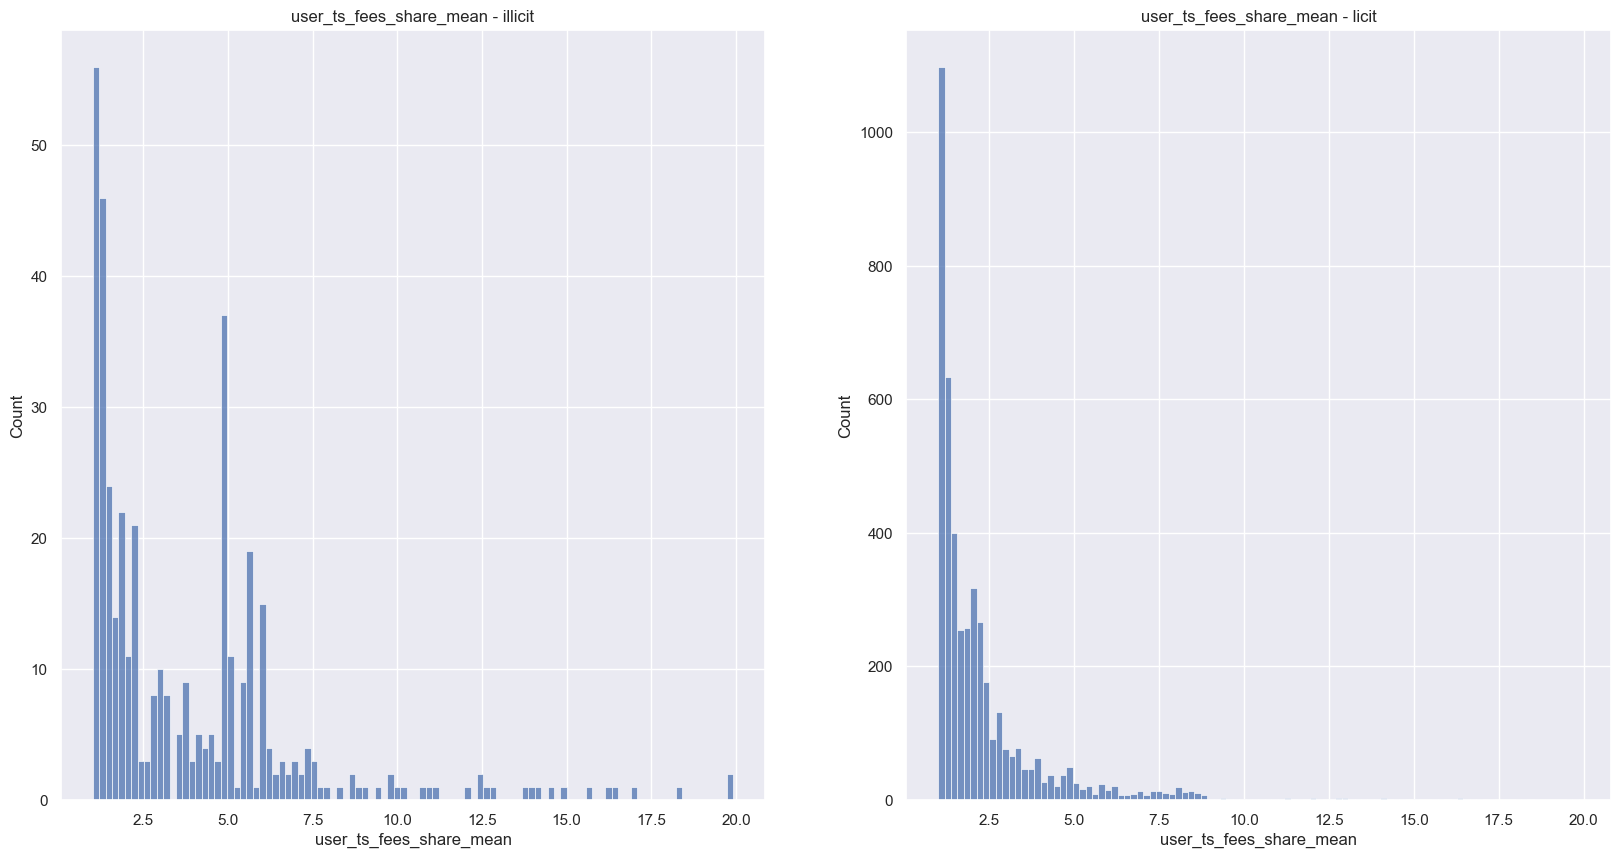

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (1 < users_features["user_ts_fees_share_mean"]) & (users_features["user_ts_fees_share_mean"] < 20)],
    x="user_ts_fees_share_mean",
    ax=ax[0],
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (1 < users_features["user_ts_fees_share_mean"]) & (users_features["user_ts_fees_share_mean"] < 20)],
    x="user_ts_fees_share_mean",
    ax=ax[1],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_mean - illicit")
ax[1].set_title("user_ts_fees_share_mean - licit")



Text(0.5, 1.0, 'user_ts_fees_share_min - licit')

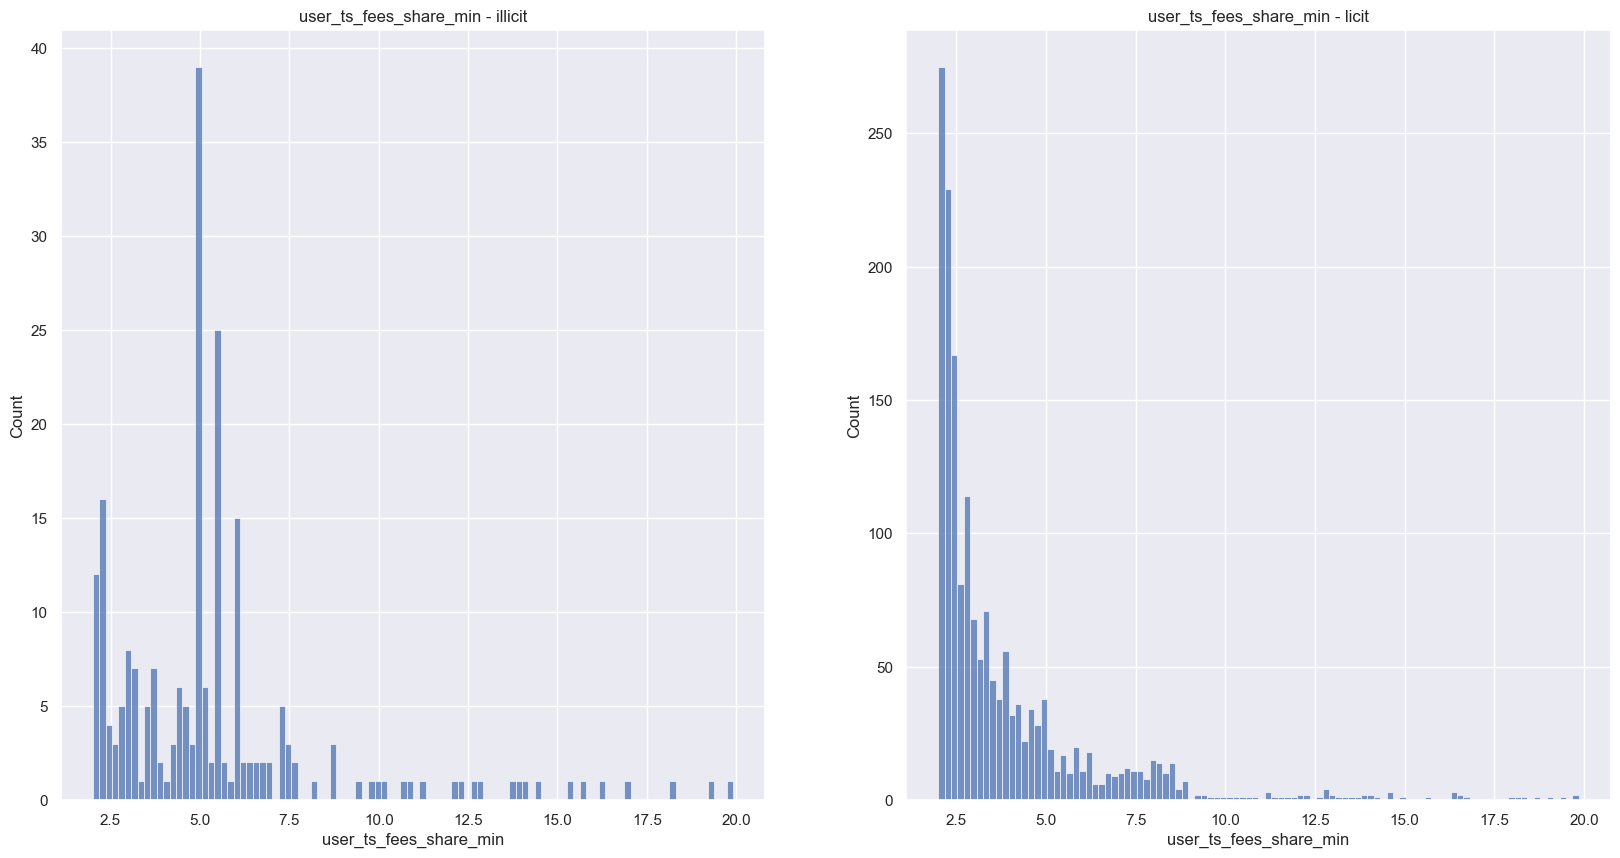

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (2 < users_features["user_ts_fees_share_min"]) & (users_features["user_ts_fees_share_min"] < 20)],
    x="user_ts_fees_share_min",
    ax=ax[0],
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (2 < users_features["user_ts_fees_share_min"]) & (users_features["user_ts_fees_share_min"] < 20)],
    x="user_ts_fees_share_min",
    ax=ax[1],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_min - illicit")
ax[1].set_title("user_ts_fees_share_min - licit")



# Анализ числа целых fees

Text(0.5, 1.0, 'whole_fee_5 - licit')

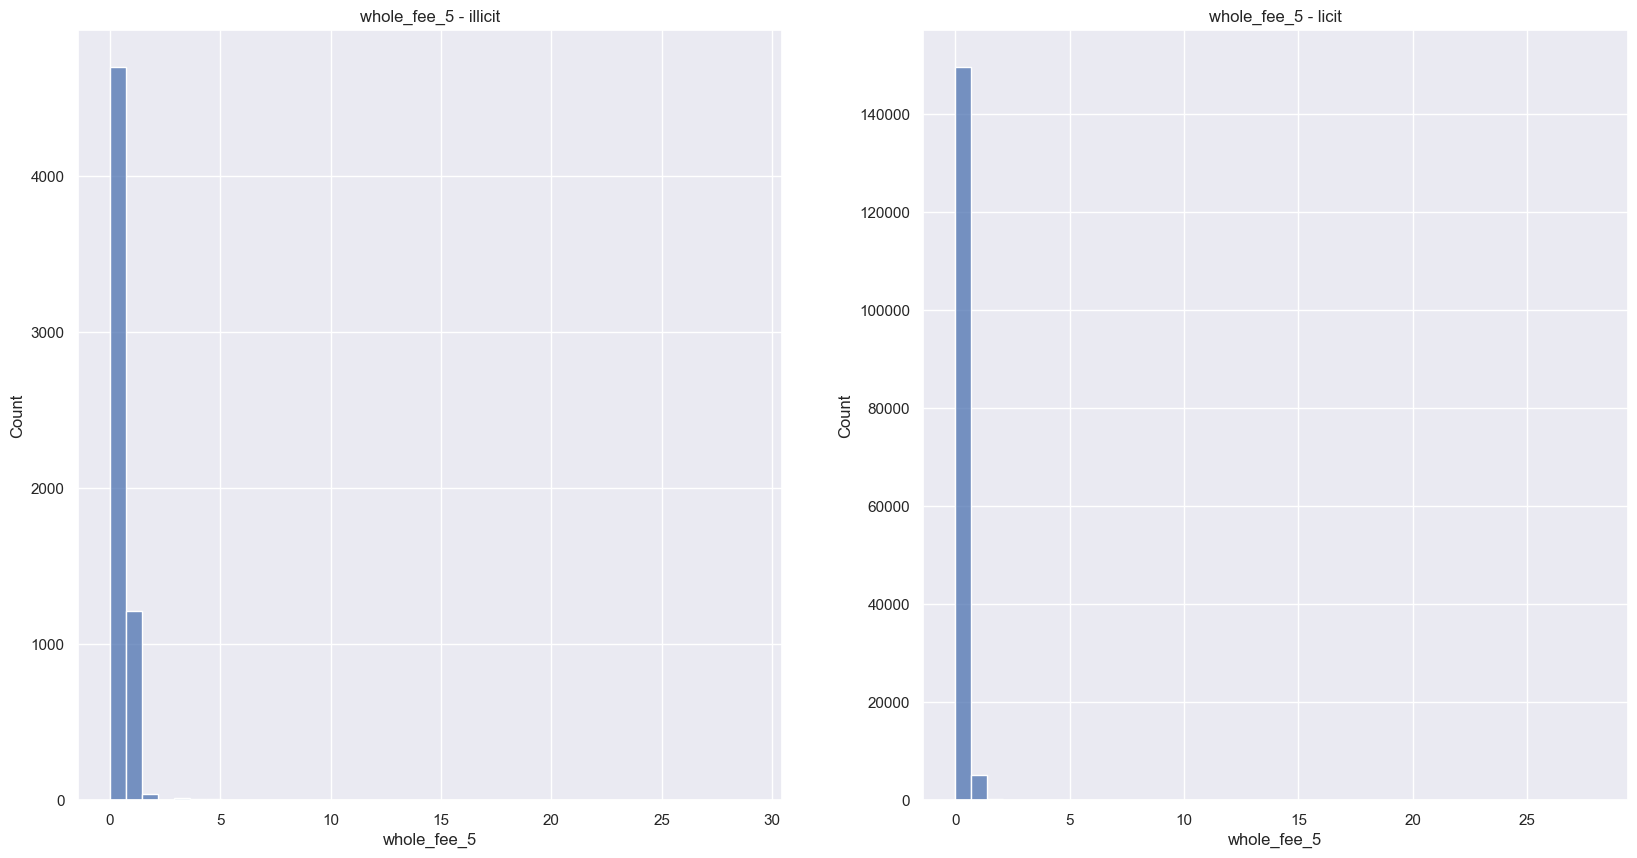

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (users_features["whole_fee_5"] > -1) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    ax=ax[0],
    bins=40,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (users_features["whole_fee_5"] > -1) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    ax=ax[1],
    bins=40,
)
ax[0].set_title("whole_fee_5 - illicit")
ax[1].set_title("whole_fee_5 - licit")



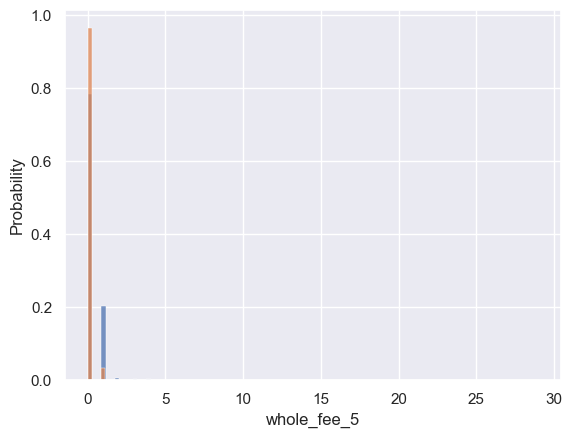

In [29]:

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (users_features["whole_fee_5"] > -1) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    stat="probability",
    # ax=ax,
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (users_features["whole_fee_5"] > -1) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    stat="probability",
    # ax=ax[0],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_mean - illicit and licit")
plt.show()

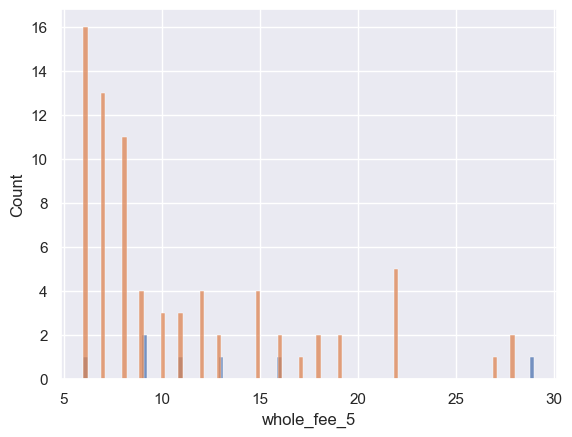

In [31]:
sns.histplot(
    data=users_features[(users_features["class"] == 1) & (users_features["whole_fee_5"] > 5) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    # stat="probability",
    # ax=ax,
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (users_features["whole_fee_5"] > 5) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    # stat="probability",
    # ax=ax[0],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_mean - illicit and licit")
plt.show()

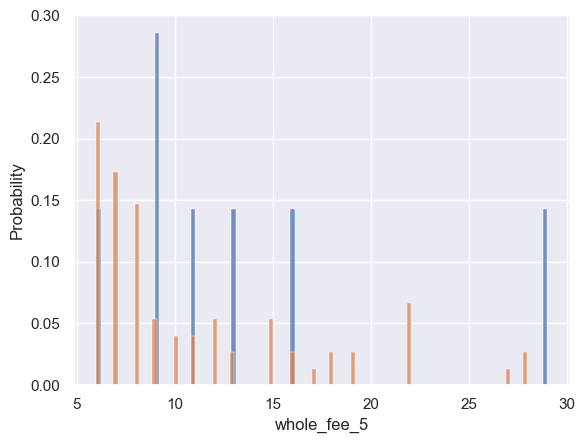

In [30]:

sns.histplot(
    data=users_features[(users_features["class"] == 1) & (users_features["whole_fee_5"] > 5) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    stat="probability",
    # ax=ax,
    bins=100,
)
sns.histplot(
    data=users_features[(users_features["class"] == 2) & (users_features["whole_fee_5"] > 5) & (users_features["whole_fee_5"] < 30)],
    x="whole_fee_5",
    stat="probability",
    # ax=ax[0],
    bins=100,
)
ax[0].set_title("user_ts_fees_share_mean - illicit and licit")
plt.show()